<a href="https://colab.research.google.com/github/cristianexer/tmp/blob/main/2021_03_19_Nerual_Networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Neural Networks from scratch

![](https://www.asimovinstitute.org/wp-content/uploads/2019/04/NeuralNetworkZoo20042019-1400x2380.png)

## Background Research

**What are neural networks ?**

Artificial Neural Networks(ANN) are efficient data-driven modelling tools widely used for nonlinear systems dynamic modelling and identification, due to their universal approximation capabilities and flexible structure that allow to capture complex nonlinear behaviors. Feed-forward multi-layer perceptron ANNs type is frequently used in engineering applications 

**Common Types of ANNs:**

- Feedforward
    - Information passes through in a single direction from an entry point or input node to an exit point or output node. It differs from other more complex ANN types in that it does not have feedback connections where the output from each layer of neurons is fed back to it for learning. A feedforward neural network does not form a cycle or loop to allow a program to learn.

    - Applications: Feedforward neural networks are used in computer vision and facial recognition applications.

- Radial Basic Functions (RBF)
    - Radial basic functions consider the distance of a point with respect to the center. RBF functions have two layers, first where the features are combined with the Radial Basis Function in the inner layer and then the output of these features are taken into consideration while computing the same output in the next time-step which is basically a memory.
    - Applications: This neural network has been applied in Power Restoration Systems. Power systems have increased in size and complexity. Both factors increase the risk of major power outages. After a blackout, power needs to be restored as quickly and reliably as possible. 

- Recurrent Neural Network (RNN)
    - This type of ANN is similar to a feedforward neural network, but it saves the output of a specific layer and feeds it back as input. As a result, it can help predict several possible outcomes from any particular layer.

    - Drilling down to specifics: If the first layer receives the output and sends it back as input, the next layers will start the recurrent neural network process. Each node retains a memory from the previous step. And so, the system remembers wrong predictions and learns from them to improve its next ones. In short, RNNs can learn from each step to predict the outcome in the next step.

    - Applications: RNNs are used in text-to-speech applications that predict what users may want to say next, depending on the context of their initial input.

- Multilayer Perceptron (MLP)
    - This type of ANN has three or more layers that classify data that cannot be linearly separated (i.e., go through a straight path). Thus, it is fully connected, which means that each node within a layer is connected to the succeeding node in the next layer.

    - Applications: MLPs aid in speech recognition and machine translation technologies.


- Kohonen Self Organizing Neural Network ( also known as Self-Organising Maps)
    - The objective of a Kohonen map is to input vectors of arbitrary dimension to discrete map comprised of neurons. The map needs to be trained to create its own organization of the training data. It comprises either one or two dimensions. When training the map the location of the neuron remains constant but the weights differ depending on the value. This self-organization process has different parts, in the first phase, every neuron value is initialized with a small weight and the input vector.

    - In the second phase, the neuron closest to the point is the ‘winning neuron’ and the neurons connected to the winning neuron will also move towards the point like in the graphic below. The distance between the point and the neurons is calculated by the euclidean distance, the neuron with the least distance wins. Through the iterations, all the points are clustered and each neuron represents each kind of cluster
    - Applications: Kohonen Neural Network is used to recognize patterns in the data. Its application can be found in medical analysis to cluster data into different categories. Kohonen map was able to classify patients having glomerular or tubular with an high accuracy



**Why Neural Networks ?**

## How do they work ?

A NN consists of a series of units called "neurons". These are usually simple processing units which take one or more inputs and produce an output. Each input to a neuron has an associated "weight" which modifies the strength of the input. When a NN is trained, these weights are adjusted to bring the output as close as possible to that desired.

The essence of NNs is to "learn" the weights that best replicate the desired output given a series of inputs.

For given input values, the NN looks at the difference between the calculated output and the desired output, and then, starting with the Output layer and working back to the Input layer, adjusts the weights according to their contribution to this difference. Usually all the weights are adjusted together - that is the changes to all the weights are calculated and then implemented simultaneously, rather than changing each weight one at a time.

![](https://miro.medium.com/max/700/1*VYCxF4prixcjppys3EK5IQ.png)

**Imports**

In [ ]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_wine, make_classification, make_regression

### Classification

#### One Epoch Training

**Parameters Specs**

Using those parameters we can define our initial random matrices

In [ ]:
n_features = 5
n_hidden_layers = 4
n_targets = 1

**Classification dummy data**

In [ ]:
X,y = make_classification(n_samples=2000, n_features=n_features)
train_X,test_X, train_y, test_y = train_test_split(X,y,random_state=42,test_size=0.33)
train_X.shape,train_y.shape

((1340, 5), (1340,))

**Input Weight Matrix**

>These dimensions are based on number of rows equals the number of attributes for the observations in our training set. The number columns equals the number of neurons in the hidden layer. The dimensions of the weights matrix between two layers is determined by the sizes of the two layers it connects. There is one weight for every input-to-neuron connection between the layers.

In [ ]:
W_1 = np.random.randn(n_hidden_layers, n_features) * 0.01
W_1

array([[-0.00631188,  0.00683958, -0.0085386 , -0.00136799, -0.00662717],
       [-0.00056565, -0.00748994, -0.00130406,  0.00115884, -0.00693   ],
       [ 0.01604485,  0.00461277, -0.00223851, -0.01027897, -0.00144147],
       [-0.0025016 ,  0.00651565,  0.00697293, -0.00438075,  0.00644069]])

**Bias Vector for the inpurt weight matrix**

>Bias is just like an intercept added in a linear equation. It is an additional parameter in the Neural Network which is used to adjust the output along with the weighted sum of the inputs to the neuron. Moreover, bias value allows you to shift the activation function to either right or left.

In [ ]:
b_1 = np.zeros(shape=(n_hidden_layers, 1))
b_1

array([[0.],
       [0.],
       [0.],
       [0.]])

**Output Weight Matrix**

In [ ]:
W_2 = np.random.randn(n_targets, n_hidden_layers) * 0.01
W_2

array([[ 0.00300714,  0.00634344, -0.00683559,  0.00707612]])

**Bias Vector for the output weight matrix**

In [ ]:
b_2 = np.zeros(shape=(n_hidden_layers, 1))
b_2

array([[0.],
       [0.],
       [0.],
       [0.]])

The activation function is applied to the weighted sum of the inputs of a neuron to translate the inputs to an output. Good candidates for transfer functions are bounded, monotonic, continuous and differentiable everywhere. 

**Sigmoid Activation Fucntion**

In [ ]:
sigmoid = lambda x: (1/(1 + np.exp(-x)))

**Feed Forward**

In [ ]:
Z_1 = np.dot(W_1,train_X.T) + b_1
A_1 = np.tanh(Z_1)
Z_2 = np.dot(W_2,A_1) + b_2
A_2 = sigmoid(Z_2)

at this point A2 has our predicted probabilities for the train dataframe

In [ ]:
A_2

array([[0.50005643, 0.49999254, 0.50002491, ..., 0.4998932 , 0.500028  ,
        0.49998286],
       [0.50005643, 0.49999254, 0.50002491, ..., 0.4998932 , 0.500028  ,
        0.49998286],
       [0.50005643, 0.49999254, 0.50002491, ..., 0.4998932 , 0.500028  ,
        0.49998286],
       [0.50005643, 0.49999254, 0.50002491, ..., 0.4998932 , 0.500028  ,
        0.49998286]])

**Now we compute the cost which in this case is Cross Entropy Loss also konown as logloss**


In [ ]:
epsilon=1e-15
loss = -1 * (train_y.reshape(1, train_y.shape[0]) * np.log(A_2 + epsilon) + (1 - train_y.reshape(1, train_y.shape[0])) * np.log(1 - A_2 + epsilon))
cost = 1 / len(train_y.reshape(1, train_y.shape[0])) * np.sum(loss)
cost = np.squeeze(cost)
cost

3715.2557736260746

**Calculate the gradients which we will use to update the weights**

In [ ]:
d_Z2 = A_2 - train_y.reshape(1, train_y.shape[0])
d_W2 = (1 / len(train_X)) * np.dot(d_Z2, A_1.T)
db_2 = (1 / len(train_X)) * np.sum(d_Z2, axis=1, keepdims=True)
d_Z1 = np.multiply(np.dot(W_2, d_Z2), 1 - np.power(A_1, 2))
d_W1 = (1 / len(train_X)) * np.dot(d_Z1, train_X)
db_1 = (1 / len(train_X)) * np.sum(d_Z1, axis=1, keepdims=True)

**Learning Rate**

In [ ]:
lr = 0.03

**Upade the Weight matrix and Bias vector using the caluclated graadients from previous step**

In [ ]:
W_1 = W_1 - lr * d_W1
b_1 = b_1 - lr * db_1
W_2 = W_2 - lr * d_W2
b_2 = b_2 - lr * db_2

**After we have updated the weights we can use the feed forward steps to get the new predictions**

at this point we have trained 1 epoch

In [ ]:
Z_1 = np.dot(W_1,train_X.T) + b_1
A_1 = np.tanh(Z_1)
Z_2 = np.dot(W_2,A_1) + b_2
A_2 = sigmoid(Z_2)

In [ ]:
A_2

array([[0.50003713, 0.4999723 , 0.5000013 , ..., 0.49987011, 0.5000108 ,
        0.49995933],
       [0.50003713, 0.4999723 , 0.5000013 , ..., 0.49987011, 0.5000108 ,
        0.49995933],
       [0.50003713, 0.4999723 , 0.5000013 , ..., 0.49987011, 0.5000108 ,
        0.49995933],
       [0.50003713, 0.4999723 , 0.5000013 , ..., 0.49987011, 0.5000108 ,
        0.49995933]])

The results have not changed that much compared with the initial epoch, so let's wrap this code into a class and train our neural network for a different number of epochs

#### Let's wrap this up in a class

In [ ]:
class NN(object):

    def __init__(self, input_size, hidden_size, output_size,learning_rate=0.03):
        # parameters shapes
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        self.learning_rate = learning_rate
        # init weights matrices
        self.init_parameters()

    def init_parameters(self):

        self.W1 = np.random.randn(self.hidden_size,self.input_size) * 0.01
        self.b1 = np.zeros(shape=(self.hidden_size, 1))

        self.W2 = np.random.randn(self.output_size,self.hidden_size) * 0.01
        self.b2 = np.zeros(shape=(self.hidden_size, 1))

    def sigmoid(self,x): 
        return (1/(1 + np.exp(-x)))

    def forward(self,X):
        Z1 = np.dot(self.W1,X) + self.b1
        A1 = np.tanh(Z1)
        Z2 = np.dot(self.W2,A1) +self.b2
        A2 = self.sigmoid(Z2) # Final output prediction
        return A1,A2

    def cost(self, y_true, y_pred, epsilon=1e-15):

        loss = -1 * (y_true * np.log(y_pred + epsilon) + (1 - y_true) * np.log(1 - y_pred + epsilon))
        cost = 1 / len(y_true) * np.sum(loss)
        return np.log(np.squeeze(cost))

    def back_propagation(self, X, Y, A1, A2):
        number_of_training_samples = len(X)
        # compute gradients
        dZ2 = A2 - Y
        dW2 = (1.0 / number_of_training_samples) * np.dot(dZ2, A1.T)
        db2 = (1.0 / number_of_training_samples) * np.sum(dZ2, axis=1, keepdims=True)

        dZ1 = np.multiply(
            np.dot(self.W2, dZ2), 
            1.0 - np.power(A1, 2)
        )

        dW1 = (1.0 / number_of_training_samples) * np.dot(dZ1, X.T)
        db1 = (1.0 / number_of_training_samples) * np.sum(dZ1, axis=1, keepdims=True)

        # update weights
        self.W1 -= (self.learning_rate * dW1)
        self.b1 -= (self.learning_rate * db1)
        self.W2 = self.W2.T - (self.learning_rate * dW2)
        self.b2 -= (self.learning_rate * db2)
        
    def fit(self, X, y_true, epochs=10,verbose=1):
        X = X.T
        y_true = y_true.reshape(1, y_true.shape[0])
        for epoch in range(epochs):
            
            A1,y_pred = self.forward(X)

            c = self.cost(y_true,y_pred)

            self.back_propagation(X,y_true,A1,y_pred)
            if epoch % verbose == 0:
                print(f'Epoch:{epoch}/{epochs} - cost: {c}')
            
    def predict(self,X):
        X = X.T
        _,A2 = self.forward(X)
        return [x.max() for x in A2.T]

**Now let's use our Neural Network**

In [ ]:
nn = NN(n_features,1,n_targets)
nn.fit(train_X,train_y,epochs=25,verbose=5)

Epoch:0/25 - cost: 6.833917509275361
Epoch:5/25 - cost: 6.323870635462693
Epoch:10/25 - cost: 6.295877828598754
Epoch:15/25 - cost: 6.287888994154125
Epoch:20/25 - cost: 6.282035530484422


**Apply Model on Test data**

In [ ]:
results = pd.DataFrame(test_X)
results['y_true'] = test_y
results['y_pred'] = nn.predict(test_X)
results[:3]

,0,1,2,3,4,y_true,y_pred
0,0.501031,-2.350484,1.948580,-2.870213,-0.263953,0,0.129548
1,-1.712485,-2.600663,1.290135,-1.890028,1.750550,0,0.129549
2,-2.766780,-1.883156,0.351031,-0.502650,-0.197338,1,0.131501


**Metrics**

In [ ]:
print('Accuracy: ',metrics.accuracy_score(results['y_true'],results['y_pred'].gt(.5).astype(int)))

Accuracy:  0.8272727272727273


In [ ]:
print(metrics.classification_report(results['y_true'],results['y_pred'].gt(.5).astype(int)))

              precision    recall  f1-score   support

           0       0.82      0.84      0.83       329
           1       0.84      0.81      0.83       331

    accuracy                           0.83       660
   macro avg       0.83      0.83      0.83       660
weighted avg       0.83      0.83      0.83       660



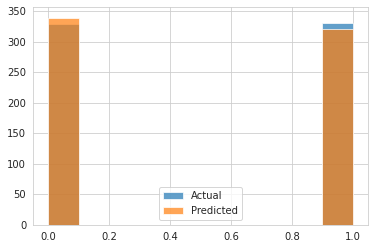

In [ ]:
plt.hist(results['y_true'],alpha=.7,label='Actual')
plt.hist(results['y_pred'].gt(0.5).astype(int),alpha=.7,label='Predicted');
plt.legend();

### Regression

#### Once Epoch Training

**Parameter Specs**

In [ ]:
n_features = 20
n_hidden_layers = 4
n_targets = 1

**Regression dummy data**

In [ ]:
X,y = make_regression(n_samples=2000, n_features=n_features)
train_X,test_X, train_y, test_y = train_test_split(X,y,random_state=42,test_size=0.33)
train_X.shape,train_y.shape

((1340, 20), (1340,))

**Core functions**

In [ ]:
def predict(w,x):
    result = x.T * w
    return np.mean(result,axis=1)

def gradient(w, x, t):
    return 2 * x.T * (predict(x, w) - t.reshape(1,-1).T)


def delta_w(w_k, x, t, learning_rate):
    return learning_rate * np.mean(gradient(w_k, x, t))

def loss(y, t):
    return np.sqrt(np.mean((t.reshape(1,-1) - y)**2))

**Training the model**

Epoch[1] - Loss: 191.4654795507951803301694
Epoch[11] - Loss: 185.206724676566267362432
Epoch[21] - Loss: 179.437355634256050507247
Epoch[31] - Loss: 174.2034113547436788849154
Epoch[41] - Loss: 169.5518287736971103640826
Epoch[51] - Loss: 165.5289987357509744470008
Epoch[61] - Loss: 162.1789562720664150674565
Epoch[71] - Loss: 159.5412906441778773114493
Epoch[81] - Loss: 157.6489393253810362693912
Epoch[91] - Loss: 156.5261008420152109010814
Epoch[101] - Loss: 156.1865386407660309942003
Epoch[111] - Loss: 156.6325294061535657874629
Epoch[121] - Loss: 157.8546271893008281494986
Epoch[131] - Loss: 159.8322849414541053647554


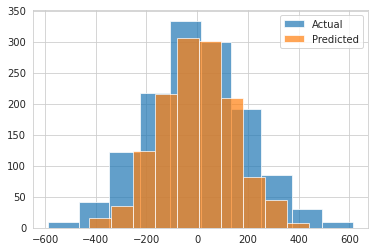

In [ ]:
n_hidden_layers = 1
learning_rate = 0.1

w = np.random.rand(n_hidden_layers,n_features)

x = train_X.T
t = train_y

nb_of_iterations =  130
verbose = 10

for i in range(nb_of_iterations+1):

    dw = delta_w(w, x, t, learning_rate)
    w -= dw 

    # print(w)

    if i % verbose == 0:
        print(f'Epoch[{i+1}] - Loss: {loss(predict(w=w,x=x), t):.25}') 


plt.hist(train_y,label='Actual',alpha=.7);
plt.hist(predict(w=w,x=x),label='Predicted',alpha=.7);
plt.legend();

#### Let's Wrap up into a class..again

In [ ]:
class NNR(object):

    def __init__(self, input_size, hidden_size, output_size,learning_rate=0.03):
        # parameters shapes
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        self.learning_rate = learning_rate
        # init weights matrices
        self.init_parameters()

    def init_parameters(self):

        self.W1 = np.random.randn(self.hidden_size,self.input_size)

    def predict(self, x):
        result = x * self.W1
        return np.mean(result,axis=1)

    def gradient(self, x, t):
        return 2 * x * (self.predict(x) - t.reshape(1,-1)).T

    def delta_w(self, x, t):
        return self.learning_rate * np.mean(self.gradient(x, t))

    def cost(self,y, t):
        return np.sqrt(np.mean((t.reshape(1,-1) - y.reshape(1,-1).T)**2))
        
    def fit(self, X, y_true, epochs=10,verbose=1):

        for epoch in range(epochs):
            dw = self.delta_w( X, y_true)
            self.W1 -= dw

            if epoch % verbose == 0:
                print(f'Epoch:{epoch}/{epochs} - cost: {self.cost(self.predict(X), t):.2f}')


In [ ]:
nnr = NNR(n_features,1,n_targets,learning_rate=0.1)
nnr.fit(train_X,train_y,epochs=130,verbose=10)

Epoch:0/130 - cost: 192.20
Epoch:10/130 - cost: 192.55
Epoch:20/130 - cost: 193.38
Epoch:30/130 - cost: 194.53
Epoch:40/130 - cost: 195.89
Epoch:50/130 - cost: 197.38
Epoch:60/130 - cost: 198.95
Epoch:70/130 - cost: 200.52
Epoch:80/130 - cost: 202.08
Epoch:90/130 - cost: 203.60
Epoch:100/130 - cost: 205.05
Epoch:110/130 - cost: 206.44
Epoch:120/130 - cost: 207.74


In [ ]:
results = pd.DataFrame(test_X)
results['y_true'] = test_y
results['y_pred'] = nnr.predict(test_X)
results[:3]

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,y_true,y_pred
0,0.300504,-1.502485,1.528171,-0.357347,-0.491012,1.574301,1.225100,-0.086599,2.255562,-0.914363,0.442334,0.576583,0.620020,-1.367436,-0.770247,-0.371141,0.555621,-0.987475,0.168115,0.113092,-21.663189,45.767221
1,0.343782,0.272212,-0.064699,-0.140448,-0.588566,0.670829,0.926857,-0.038570,-1.050645,-0.237553,0.500089,-0.237830,-0.013772,0.699805,-0.165918,-0.350467,-1.584418,0.688303,-0.622688,1.273929,55.503551,4.951251
2,-0.181931,1.456127,-0.554732,0.633134,1.119143,-0.818410,-0.876868,0.623699,-0.442342,-1.617016,0.658834,0.867214,0.097908,0.576261,-0.075242,-1.728641,0.056180,-0.735676,1.045112,1.156614,-9.055754,22.941940


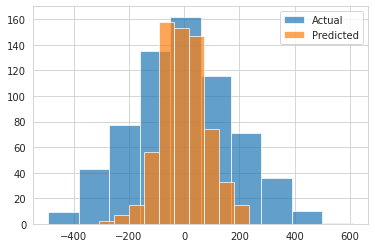

In [ ]:
plt.hist(results['y_true'],label='Actual',alpha=.7);
plt.hist(results['y_pred'],label='Predicted',alpha=.7);
plt.legend();

## Let's apply them on real life data

***Wine recognition dataset***

**Data Set Characteristics:**

- Number of Instances: 178 (50 in each of three classes)
- Number of Attributes: 13 numeric, predictive attributes and the class
- Attribute Information:
    - Alcohol
    - Malic acid
    - Ash
    - Alcalinity of ash  
    - Magnesium
    - Total phenols
    - Flavanoids
    - Nonflavanoid phenols
    - Proanthocyanins
    - Color intensity
    - Hue
    - OD280/OD315 of diluted wines
    - Proline

- class: [ class_0, class_1, class_2 ]
    


**Load Wine Data**

In [ ]:
wine = load_wine()

In [ ]:
wine.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])

**Add data into a dataframe**

In [ ]:
data = pd.DataFrame(wine['data'],columns=wine['feature_names'])
data['target'] = wine['target']
data.loc[data.target==2,'target'] = 1
data[:3]

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0


**Set targets**

In [ ]:
clf_target = 'target'
reg_target = 'alcohol'

**Train Test Split data**

In [ ]:
train,test = train_test_split(data, test_size=0.33, random_state=42, stratify=data[clf_target])

**Convert dataframes to numpy arrays**

In [ ]:
clf_train_x = train.drop([clf_target],axis=1).to_numpy()
clf_train_y = train[clf_target].to_numpy()

reg_train_x = train.drop([clf_target,reg_target],axis=1).to_numpy()
reg_train_y = train[reg_target].to_numpy()

**Train Neural Network for Classificaiton**

In [100]:
clf = NN(13,2,1,learning_rate=0.0001)
clf.fit(clf_train_x,clf_train_y,verbose=10,epochs=100)

Epoch:0/100 - cost: 5.106135379884956
Epoch:10/100 - cost: 5.103701414004047
Epoch:20/100 - cost: 5.1025833977790045
Epoch:30/100 - cost: 5.101350249521844
Epoch:40/100 - cost: 5.10012644856383
Epoch:50/100 - cost: 5.099012213442998
Epoch:60/100 - cost: 5.097714378636637
Epoch:70/100 - cost: 5.096834676637267
Epoch:80/100 - cost: 5.095642509100944
Epoch:90/100 - cost: 5.094579101971179


**Results and Metrics**

In [101]:
test_copy = test.copy()
test_copy['y_pred'] = clf.predict(test.drop([clf_target],axis=1).to_numpy())

In [102]:
print(metrics.classification_report(test_copy.target,test_copy.y_pred.gt(.5).astype(int),zero_division=False))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        20
           1       0.66      1.00      0.80        39

    accuracy                           0.66        59
   macro avg       0.33      0.50      0.40        59
weighted avg       0.44      0.66      0.53        59



**Train Neural Network for Regresssion**

In [103]:
reg = NNR(12,1,1, learning_rate=0.0001)
reg.fit(reg_train_x, reg_train_y, verbose=1, epochs=5)

Epoch:0/5 - cost: 192.71
Epoch:1/5 - cost: 192.78
Epoch:2/5 - cost: 192.76
Epoch:3/5 - cost: 192.76
Epoch:4/5 - cost: 192.76


**Results and Metrics**

In [104]:
test_copy = test.copy()
test_copy['y_pred'] = reg.predict(test.drop([clf_target,reg_target],axis=1).to_numpy())

In [105]:
print('RMSE: ',metrics.mean_squared_error(test_copy[reg_target],test_copy['y_pred'],squared=False))

RMSE:  6.297109835293276


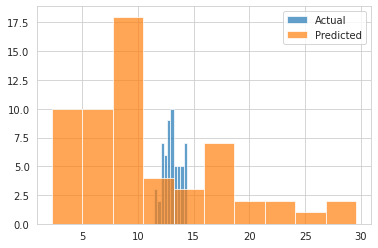

In [106]:
plt.hist(test_copy[reg_target], label='Actual', alpha=.7)
plt.hist(test_copy['y_pred'], label='Predicted', alpha=.7)
plt.legend();

## Conclusions

- Is essential to have at least a high level understanding of how those works, but also to know how to work around the activation functions and the optimizers which are in a very strong relationship with each other
- You can tweak the training time and performance by adjusting the learning rate and weights properly
- The larger dimensional space gets in the weights, the higher the training time

## References

- [Neural Net from scratch (using Numpy) by Sanjay.M](https://towardsdatascience.com/neural-net-from-scratch-using-numpy-71a31f6e3675)
- [Artificial Neural Networks: Types and Applications by TECHSLANG](https://www.techslang.com/artificial-neural-networks-types-and-applications/)
- [6 Types of Artificial Neural Networks Currently Being Used in Machine Learning by Kishan Maladkar ](https://analyticsindiamag.com/6-types-of-artificial-neural-networks-currently-being-used-in-todays-technology/)
- [ML Glossary](https://ml-cheatsheet.readthedocs.io/en/latest/forwardpropagation.html)

- [NN From scratch](https://towardsdatascience.com/a-neural-network-from-scratch-c09fd2dea45d)

- [neural-network-implementation](https://peterroelants.github.io/posts/neural-network-implementation-part01/)